In [1]:
import pandas as pd

## STEP 1:

1.	Concat: vertically concatenate the two csvs into a new dataframe df_full; for missing values in the test set use a random selection of values in the same column from the train set. 

In [2]:
df_train = pd.read_csv('./train.csv')

df_test = pd.read_csv('./test.csv')

df_full = pd.concat([df_train,df_test])

df_full.shape

(9358, 12)

In [3]:
df_full.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


# STEP 2

2.	Filter: on df_full select only the weekdays, where the relative humidity is >50 and abso <1.4 denote this df_filtered.

In [4]:
df_filtered= df_full[(df_full['absolute_humidity']<1.4) & (df_full['relative_humidity']>50)]

df_filtered.shape

(3284, 12)

In [5]:
# Make Year, Month, Day Columns in case they are needed

df_filtered['Year'] = df_filtered['date_time'].str[:4]
df_filtered['Month'] = df_filtered['date_time'].str[5:7]
df_filtered['Day'] = df_filtered['date_time'].str[8:10]

/tmp/ipykernel_1898/3227111291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['date_time'].str[:4]
/tmp/ipykernel_1898/3227111291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['date_time'].str[5:7]
/tmp/ipykernel_1898/3227111291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

# STEP 3

3.	Apply: on df_filtered perform sensor 2 * sensor 3 if sensor 4 < MEDIAN VALUE, else sensor 2.* ( sensor 4 - average of that calendar month value)

In [6]:
median_sensor_4 = df_filtered['sensor_4'].median()

sensor4_monthly_avg = df_filtered.groupby(['Month'])['sensor_4'].mean()

df_filtered['sensor_4_mnth_avg'] = df_filtered['Month'].map(sensor4_monthly_avg)

mask_rows = df_filtered['sensor_4']<median_sensor_4

new_feature = mask_rows.map({True:1,False:0})*df_filtered['sensor_2']*df_filtered['sensor_3'] + (1-mask_rows)*df_filtered['sensor_2']*(df_filtered['sensor_4'] - df_filtered['Month'].map(sensor4_monthly_avg))

df_filtered['new feature (STEP 3)'] = new_feature

/tmp/ipykernel_1898/3096488222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sensor_4_mnth_avg'] = df_filtered['Month'].map(sensor4_monthly_avg)
/tmp/ipykernel_1898/3096488222.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['new feature (STEP 3)'] = new_feature


# STEP 4 

4.	Groupby: on df_fill table find the min/max/mean/count temp over each day as a table

In [7]:
df_filtered.groupby('Day')['deg_C'].describe()[['min','max','mean','count']]

,min,max,mean,count
Day,,,,
01,1.7,18.9,9.805063,79.0
02,2.1,22.9,11.482895,76.0
03,1.2,20.9,12.209474,95.0
04,1.8,22.6,12.402941,102.0
05,0.8,23.0,13.064748,139.0
06,0.3,24.0,13.722807,114.0
07,4.7,19.7,12.290426,94.0
08,0.3,22.3,11.450962,104.0
09,1.9,23.6,12.051087,92.0


# STEP 5

5.	Create a column on df_full:

a.	read in a dict : 5 unequal splits, 0-0.2, 0.2-0.5, 0.5-0.8, 0.8-0.85, 1 - make it generic

b.	apply to sensor 1 = name it Truth, apply to sensor 2 = name it Predicted



I'm not sure exactly what the intructions want here , giving my best guess 




In [135]:
import numpy as np

df_full['sensor_1_norm'] = df_full['sensor_1']/(df_full['sensor_1'].max())

criteria = [df_full['sensor_1_norm'].between(0, 0.2), df_full['sensor_1_norm'].between(0.2, 0.5), df_full['sensor_1_norm'].between(0.5, 0.8)
           ,df_full['sensor_1_norm'].between(0.8, 0.85),df_full['sensor_1_norm'].between(0.8, 1.)]

values = [0,1,2,3,4]

df_full['Truth'] = np.select(criteria, values, 0)

df_full['sensor_2_norm'] = df_full['sensor_2']/(df_full['sensor_2'].max())

criteria = [df_full['sensor_2_norm'].between(0, 0.2), df_full['sensor_2_norm'].between(0.2, 0.5), df_full['sensor_2_norm'].between(0.5, 0.8)
           ,df_full['sensor_2_norm'].between(0.8, 0.85),df_full['sensor_2_norm'].between(0.8, 1.)]

df_full['Predicted'] = np.select(criteria, values, 0)


### ???  Sorry, just didn't understand the instruction for this one

# STEP 6

6.	Merge: starting from df_full let’s look at the differences to the same day last year for available days

* a.	How many days overlap in the two latest years?
* b.	What is the average of the daily difference of abs humidity?
* c.	What is the difference in average of sensor 1 data between the two years?


In [127]:
import datetime

df_full['DateTime'] = pd.to_datetime(df_full['date_time'], format='%Y-%m-%d %H:%M:%S')


time_change = pd.Timedelta(days=365)

df_full['One Year Later'] = df_full['DateTime'] + time_change

overlap_bool = df_full['DateTime'].isin(df_full['One Year Later'])

overlapping_days = len(df_full[overlap_bool].groupby(['Month','Day']).mean().index)

humidity_avg_daily_diff = (df_full[overlap_bool]['absolute_humidity'] - df_full[~overlap_bool]['absolute_humidity']).mean()

sensor1_change = df_full[overlap_bool]['sensor_1'].mean() - df_full[~overlap_bool]['sensor_1'].mean()

print(f"There are {overlapping_days} days (same day of month) with data for both 2010 and 2011 ")

print()

print(f"The avg diff in humidity from is {humidity_avg_daily_diff} ")

print()

print(f" The change in avg value of sensor1 is {sensor1_change} ")

There are 26 days (same day of month) with data for both 2010 and 2011 

The avg diff in humidity from is -0.15998207705192632 

 The change in avg value of sensor1 is 52.95039218464217 


/tmp/ipykernel_1898/1336090820.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overlapping_days = len(df_full[overlap_bool].groupby(['Month','Day']).mean().index)


# STEP 7

7.	Plots on df_full:

- a.	histogram of absolute humidity

- b.	sensor 1 - 5 histograms overlaid on same figure

- c.	scatter plot of sensor 1 vs sensor 2 coloured blue if weekday, red otherwise

- d.	correlation matrix of all sensors against each other with histograms along diag

- e.	confusion matrix of predicted vs truth


## Histogram of Absolute Humidity

<AxesSubplot: ylabel='Frequency'>

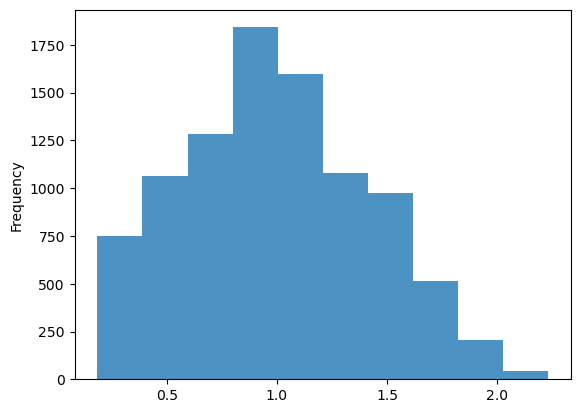

In [47]:
df_full['absolute_humidity'].plot.hist(alpha=0.8)

In [91]:
## Historgrams of Each Sensor on the same plot

<AxesSubplot: ylabel='Frequency'>

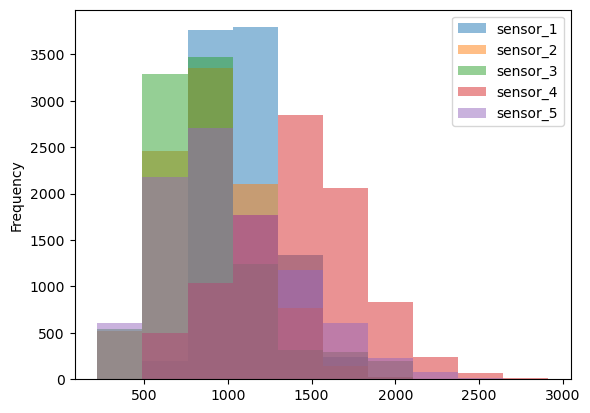

In [49]:
df_full[['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']].plot.hist(alpha=0.5)

## Scatter Plot Sensor 1 VS Sensor 2 Colored Red = Weekend Blue = Weekday 

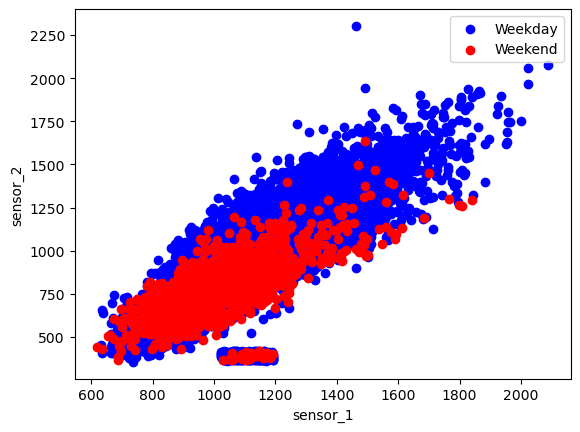

In [97]:
import matplotlib.pyplot as plt



df_full['Day of Week']=df_full['DateTime'].dt.dayofweek

df_full['WeekDay'] = df_full['Day of Week']<6

for i in range(2):
    
    if i == 0:
        
        df = df_full[df_full['WeekDay']==True]
        
        plt.scatter(data=df,x='sensor_1',y='sensor_2',c='blue')
        
    elif i==1:
        
        df = df_full[df_full['WeekDay']==False]
        
        plt.scatter(data=df,x='sensor_1',y='sensor_2',c='red')
        
plt.xlabel('sensor_1')
plt.ylabel('sensor_2')

plt.legend(['Weekday','Weekend'])
        
plt.show()

In [ ]:
df_full.plot.scatter(x='sensor_1',y='sensor_2',c=df_full['Day of Week'])

## Correlation matrix of all sensors against each other with histograms along diag

# Histograms along diagonal with pairwise scatter plots of all sensors 

array([[<AxesSubplot: xlabel='sensor_1', ylabel='sensor_1'>,
        <AxesSubplot: xlabel='sensor_2', ylabel='sensor_1'>,
        <AxesSubplot: xlabel='sensor_3', ylabel='sensor_1'>,
        <AxesSubplot: xlabel='sensor_4', ylabel='sensor_1'>,
        <AxesSubplot: xlabel='sensor_5', ylabel='sensor_1'>],
       [<AxesSubplot: xlabel='sensor_1', ylabel='sensor_2'>,
        <AxesSubplot: xlabel='sensor_2', ylabel='sensor_2'>,
        <AxesSubplot: xlabel='sensor_3', ylabel='sensor_2'>,
        <AxesSubplot: xlabel='sensor_4', ylabel='sensor_2'>,
        <AxesSubplot: xlabel='sensor_5', ylabel='sensor_2'>],
       [<AxesSubplot: xlabel='sensor_1', ylabel='sensor_3'>,
        <AxesSubplot: xlabel='sensor_2', ylabel='sensor_3'>,
        <AxesSubplot: xlabel='sensor_3', ylabel='sensor_3'>,
        <AxesSubplot: xlabel='sensor_4', ylabel='sensor_3'>,
        <AxesSubplot: xlabel='sensor_5', ylabel='sensor_3'>],
       [<AxesSubplot: xlabel='sensor_1', ylabel='sensor_4'>,
        <AxesSubplot:

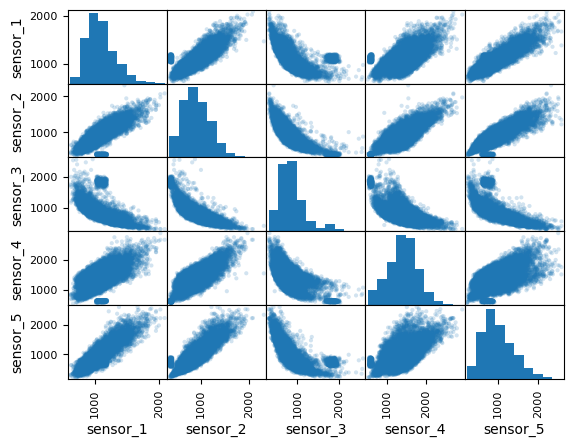

In [128]:
pd.plotting.scatter_matrix(df_full[['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']], alpha=0.2)

In [129]:
# Correlation of all Sensors 
df_full[['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']].corr().style.background_gradient(cmap='coolwarm')

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
sensor_1,1.000000,0.796913,-0.587970,0.583242,0.861892
sensor_2,0.796913,1.000000,-0.802304,0.792547,0.848273
sensor_3,-0.587970,-0.802304,1.000000,-0.637138,-0.702862
sensor_4,0.583242,0.792547,-0.637138,1.000000,0.577118
sensor_5,0.861892,0.848273,-0.702862,0.577118,1.000000


# Confusion Matrix Predicted Vs Truth

<AxesSubplot: >

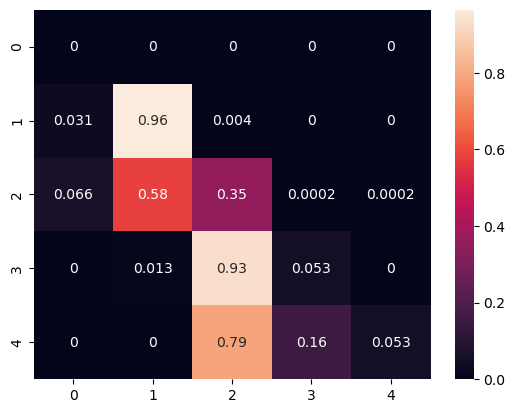

In [147]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

c_matrix = confusion_matrix(df_full['Truth'],df_full['Predicted'],normalize='true')

sns.heatmap(data=c_matrix,annot=True)

# STEP 8

8.	Create data split: 70%/30% split of the data from the train.csv ensure that each day is not split between sets

In [83]:
from sklearn.model_selection import train_test_split

df_train_70, df_train_30 = train_test_split(df_train, test_size=0.3)

In [85]:
df_train_70.shape

(4977, 12)

In [86]:
df_train_30.shape

(2134, 12)